# Die Einhörnchen vom Central Park
In dieser Übung analysieren wir einen weiteren öffentlichen Datensatz: Den [Central Park Squirrel Census](https://data.cityofnewyork.us/Environment/2018-Central-Park-Squirrel-Census-Squirrel-Data/vfnx-vebw). 

Dabei haben "Forschende" während einem Tag versucht, die Anzahl an Einhörnchen im Central Park in New York City zu zählen. Sie haben zweimal gezählt, am Morgen und am Abend. Sie haben den gesamten Central Park in ein Schachbrett aufgeteilt, wobei Freiwillige innerhalb von ihrem Bereich für jedes angetroffene Einhörnchen einen Eintrag gemacht haben. Dabei würde festgehalten, welche Farbe das Einhörnchen hat, welche Aktivität das Einhörnchen gerade verfolgte, und an welchen Koordinaten genau das Einhörnchen angetroffen wurde.

### 1.1 Die Daten laden
Die Daten sind im File `squirrel.csv`. Lade die Daten in ein Pandas DataFrame.

In [2]:
import pandas as pd
data = pd.read_csv("squirrel.csv")

Und schaue dir die ersten 5 Zeilen darin an:

In [4]:
data.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


Beantworte folgende Fragen:
- Welche Spalten hat der Datensatz?
- Wie viele Einträge gibt es?

In [5]:
# Spalten anzeigen
data.columns

Index(['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Shift', 'Date',
       'Hectare Squirrel Number', 'Age', 'Primary Fur Color',
       'Highlight Fur Color', 'Combination of Primary and Highlight Color',
       'Color notes', 'Location', 'Above Ground Sighter Measurement',
       'Specific Location', 'Running', 'Chasing', 'Climbing', 'Eating',
       'Foraging', 'Other Activities', 'Kuks', 'Quaas', 'Moans', 'Tail flags',
       'Tail twitches', 'Approaches', 'Indifferent', 'Runs from',
       'Other Interactions', 'Lat/Long'],
      dtype='object')

In [6]:
# Anzahl Einträge
data.shape

(3023, 31)

> Wir haben 3023 Einträge, mit 31 Spalten.

### 1.2 Der Tag eines Einhörnchens 
Die Spalte `Shift` enthält den Wert "AM" wenn die Zählung am Morgen erfolgte, und "PM", wenn die Zählung am Nachmittag war. Wir fragen uns nun, welche Aktivitäten ein Einhörnchen eher am Morgen, und welche am Nachmittag eher macht.

Wie viele Zählungen haben wir am Morgen, wie viele am Nachmittag?

In [13]:
data["Shift"].value_counts()

PM    1676
AM    1347
Name: Shift, dtype: int64

> Wir haben etwas mehr Zählungen am Nachmittag als am Morgen, sie scheinen sich also morgens noch etwas besser zu verstecken.

Es wurden drei verschiedene Arten von Bewegung aufgezeichnet: `Running` - wenn es rennt, `Chasing` - wenn es irgentetwas verfolgt, und `Climbing` - wenn es klettert. Diese drei Aktivitäten sind in drei Spalten vom Typ `bool`, also mit True/False Werten. Erstelle daraus eine weitere Spalte, `"In Movement"`, welche besagt, ob das Einhörnchen in Bewegung war. Sie hat den Wert `True`, wenn das Einhörnchen entweder rennt, verfolgt oder klettert.

In [39]:
data["In Movement"] = data["Running"] | data["Chasing"] | data["Climbing"]

Gruppiere nun die Daten nach "Shift" und berechne den Durchschnitt der Spalten "Eating" (isst), "Foraging" (sammelt Essen), und "In Movement". Essen die Einhörnchen lieber morgens oder nachmittags? Wann sammeln sie ihr Essen? Wann sind sie eher in Bewegung?

In [40]:
data.groupby("Shift").agg({"Eating": "mean", "Foraging": "mean", "In Movement": "mean"})

,Eating,Foraging,In Movement
Shift,,,
AM,0.219748,0.446177,0.513734
PM,0.276850,0.497613,0.440931


> Am Morgen waren 22% der Einhörnchen am Essen, am Nachmittag waren es 28%. Am Sammeln waren sie mit 50% auch am Nachmittag häufiger beschäftigt als am Morgen (45%). Dagegen waren sie am Morgen häufiger in Bewegung. Alles in allem sind die Unterschiede von Morgen zu Abend aber nicht so gross, ein Tag eines Einhörnchens scheint also ziemlich ausgeglichen zu sein.

### 1.3 Interaktionen mit Menschen
Wir haben auch drei True/False-Spalten welche sagen, wie die Einhörnchen mit Menschen interagieren. Diese sind "Approaches" - nähern sich an, "Indifferent" - ist ihnen egal, und "Runs from" - rennen weg. Erstelle eine neue Spalte `"Interact with humans"` welche nur True ist, wenn eine der drei Interaktionen stattfindet.

In [24]:
data["Interacts with humans"] = data["Approaches"] | data["Indifferent"] | data["Runs from"]

In wie vielen Einträgen hat eine Interaktion stattgefunden? 

In [25]:
data["Interacts with humans"].sum()

2243

Erstelle nun ein neues DataFrame namens `interaction_data`, welches nur Datenpunkte enthält, bei denen die Spalte `"Interacts with humans"` "True" ist.

In [26]:
# data["Interacts with humans"] ist eine Series mit bool-Werten. 
# Daher können wir das ganze DataFrame damit filtern
interaction_data = data[data["Interacts with humans"]]

Gruppiere `interaction_data` nach "Shift" und sage, wann die Einhörnchen häufiger von den Menschen wegrennen.

In [29]:
interaction_data.groupby("Shift").agg({"Runs from": "mean"})

,Runs from
Shift,
AM,0.271442
PM,0.329949


> Am Nachmittag rennen die Einhörnchen öfter von Menschen weg als am Morgen. Vielleicht hängt das damit zusammen, dass sie am Nachmittag auch öfter am Essen sind, und sie nicht gerne dabei gestört werden.

Im Feld `Age` haben wir drei mögliche Werte: "Adult" - erwachsen, "Juvenile" - Jungtier, und ?, wenn das Alter nicht bestimmt werden konnte. Sind erwachsene Tiere häufiger "Indifferent" gegenüber Menschen als Jungtiere, weil sie weniger neugierig und auch weniger schreckhaft sind? 

In [38]:
interaction_data.groupby("Age").agg({"Indifferent": "mean", "Approaches": "mean", "Runs from": "mean"})

,Indifferent,Approaches,Runs from
Age,,,
?,1.000000,0.000000,0.000000
Adult,0.655458,0.078117,0.295396
Juvenile,0.610169,0.093220,0.343220


> Erwachsene Tiere sind zu 65.5% "Indifferent", wohingegen Jungtiere nur zu 61.0% "Indifferent" sind. Jungtiere nähern sich öfter den Menschen an, rennen aber auch häufiger davon weg.

Im Feld `"Primary Fur Color"` haben wir die Farbe des Einhörnchens - sie sind entweder Schwarz, Zimtfarbig oder Grau. Inwiefern wirkt sich die Farbe des Fells auf das Verhalten gegenüber Menschen aus?

In [42]:
interaction_data.groupby("Primary Fur Color").agg(
    {"Indifferent": "mean", "Approaches": "mean", "Runs from": "mean"
})

,Indifferent,Approaches,Runs from
Primary Fur Color,,,
Black,0.564103,0.076923,0.410256
Cinnamon,0.595395,0.144737,0.286184
Gray,0.662140,0.068441,0.299294


> Hier scheint es (erstaunlich) grosse Unterschiede zu geben: Die Zimtfarbigen Einhörnchen scheinen deutlich neugieriger zu sein, während die schwarzen Tiere viel scheuer sind.

Welche Farbe kommt im gesamten Datensatz wie häufig vor?

In [43]:
data["Primary Fur Color"].value_counts()

Gray        2473
Cinnamon     392
Black        103
Name: Primary Fur Color, dtype: int64

> Die Verteilung ist sehr unausgeglichen, wir haben viel mehr graue Einhörnchen als die anderen Farben. Vielleicht führt dies auch zu den unterschieden. Vielleicht haben wir auch nur so wenige schwarze Einhörnchen in den Daten, weil sie sich immer weggeschlichen haben.

### 1.4 Wo sie sich aufhalten
In der Spalte "Y" haben wir die Longitude - also wie weit nördlich sich die Squirrels im Park aufhalten. Nun wollen wir herausfinden, ob die Squirrels eher oben oder unten im Park sind. 

Erstelle ein Histogramm der Variable "Y", mit adäquaten Labels.

Text(0, 0.5, 'Count')

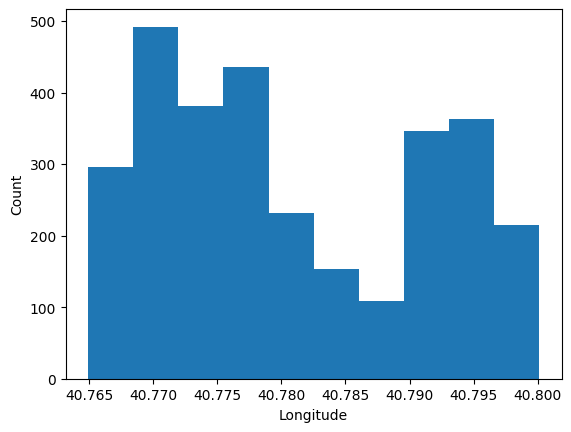

In [45]:
from matplotlib import pyplot as plt

plt.hist(data["Y"])
plt.xlabel("Longitude")
plt.ylabel("Count")

>Die meisten Eichhörnchen sind also im Süden. In der Mitte hat es viel weniger Tiere, ganz im Norden dann wieder etwas mehr.